<a href="https://colab.research.google.com/github/ricardoBatista77/Business-IA/blob/master/Stock_Price_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
df=web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2020-03-31' )

In [8]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004
2020-03-26,258.679993,246.360001,246.520004,258.440002,63021800.0,258.440002
2020-03-27,255.869995,247.050003,252.750000,247.740005,51054200.0,247.740005


In [9]:
df.shape

(2074, 6)

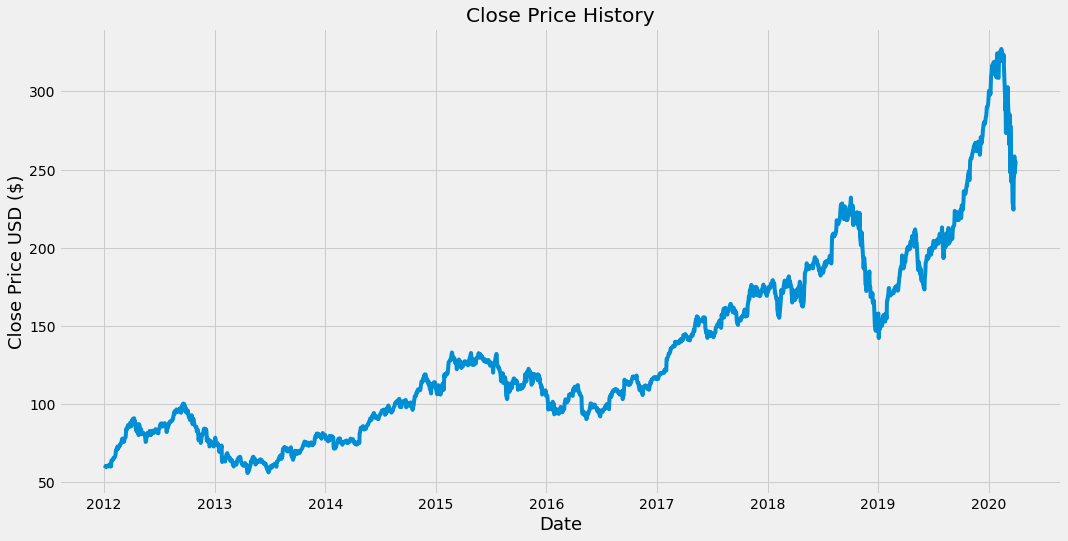

In [11]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [13]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset) * 8)
training_data_len

16592

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.70723259],
       [0.73328171],
       [0.73136577]])

In [23]:
train_data=scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [0]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [25]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2014, 60, 1)

In [0]:
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [39]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
2014/2014 [==============================] - 70s 35ms/step - loss: 0.0011


In [0]:
#Create the testing data set
#Create new array containing scaled values from index
test_data=scaled_data[training_data_len -60:,:]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [0]:
x_test = np.array(x_test)

In [65]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

IndexError: ignored

In [52]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

ValueError: ignored

In [54]:
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

NameError: ignored

In [57]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figuresize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
ply.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Trin','Val','Predictions'], loc='lower right')
plt.show()


NameError: ignored